- [x] 1 Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
- [x] 2 Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
- [x] 3 Разделите данные на выборку для обучения и тестирования
- [x] 4 Постройте модель LDA
- [x] 5 Визуализируйте предсказания для тестовой выборки и центры классов
- [x] 6 Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
- [ ] 7 Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data_class = iris.target

In [6]:
data.head()
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
data = data[['sepal length (cm)', 'sepal width (cm)']]
data.columns = ['length', 'width']
data.head()

,length,width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [8]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size = 0.25)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
lda = LinearDiscriminantAnalysis()

In [12]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [13]:
lda.predict(X_test)

array([2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 1,
       0, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 2, 1])

In [14]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.sample(10)

,0,1
0,2,2
22,0,0
7,2,2
16,1,1
37,1,1
17,2,2
27,2,2
2,0,0
11,2,2
31,0,0


In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_test, lda.predict(X_test))

0.7894736842105263

In [17]:
lda.coef_

array([[-6.28712501,  7.95241608],
       [ 2.26121137, -4.36889994],
       [ 4.65790818, -4.46446338]])

In [18]:
lda.means_

array([[5.005     , 3.3975    ],
       [5.91142857, 2.77714286],
       [6.50540541, 3.00810811]])

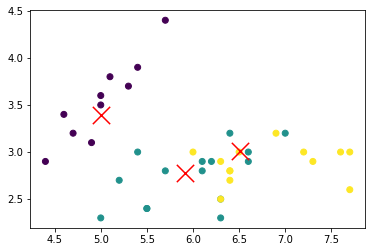

In [19]:
plt.scatter(X_test['length'], X_test['width'], c = y_test)
plt.scatter(lda.means_[:,0], lda.means_[:,1], c = 'r', marker = 'x', s = 300)

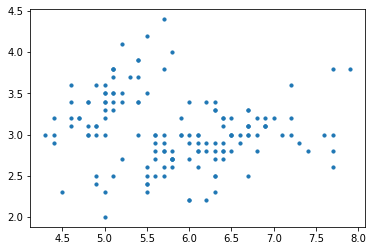

In [20]:
plt.scatter(data['length'], data['width'], s=10)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
data_scaled = scaler.fit_transform(data)

In [24]:
data_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

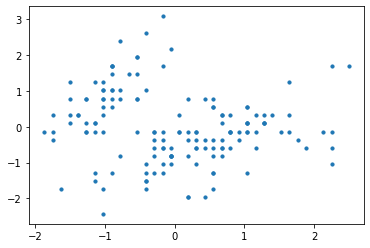

In [25]:
plt.scatter(data_scaled[:,0], data_scaled[:,1], s=10)

## думаю, в нашем датасете масштабирование было излишним

In [28]:
from sklearn.cluster import KMeans

In [46]:
k_inertia = []
ks = range(1,20)

In [47]:
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    k_inertia.append(clf_kmeans.inertia_)

In [48]:
len(k_inertia)

19

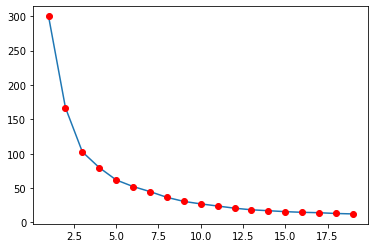

In [52]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia, 'ro')

## По получившейся картине оптимальное количество кластеров однозначно определить затруднительно, поэтому попробуй визуализировать несколько вариантов

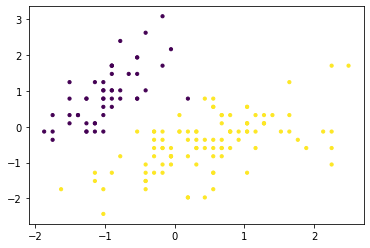

In [58]:
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(data_scaled)
plt.scatter(data_scaled[:,0], data_scaled[:,1], s=10, c = clusters)

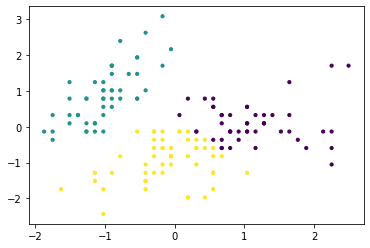

In [59]:
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(data_scaled)
plt.scatter(data_scaled[:,0], data_scaled[:,1], s=10, c = clusters)

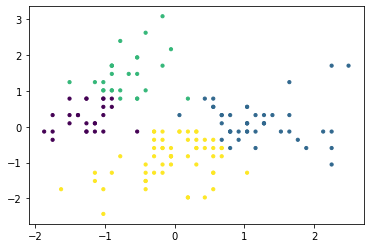

In [60]:
kmeans = KMeans(n_clusters = 4)
clusters = kmeans.fit_predict(data_scaled)
plt.scatter(data_scaled[:,0], data_scaled[:,1], s=10, c = clusters)

## Визуально похоже, что оптимальное количество кластеров - 2. Граница между ними видна невооруженным глазом, а дальнейшее увеличение количества групп выглядит надуманным.